In [42]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Load the data
df = pd.read_csv('train.csv')
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [3]:
df.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


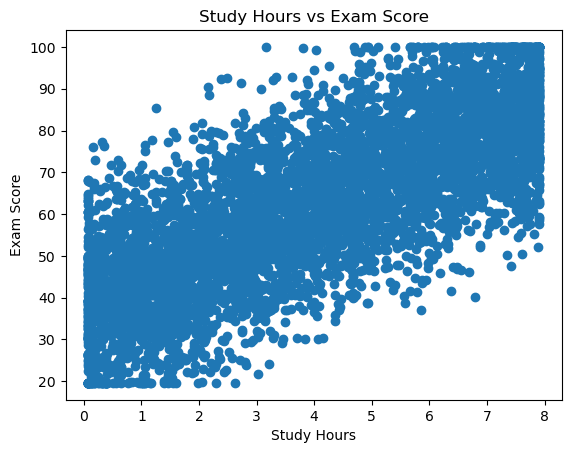

In [5]:
plt.scatter(df['study_hours'][::100], df['exam_score'][::100])
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

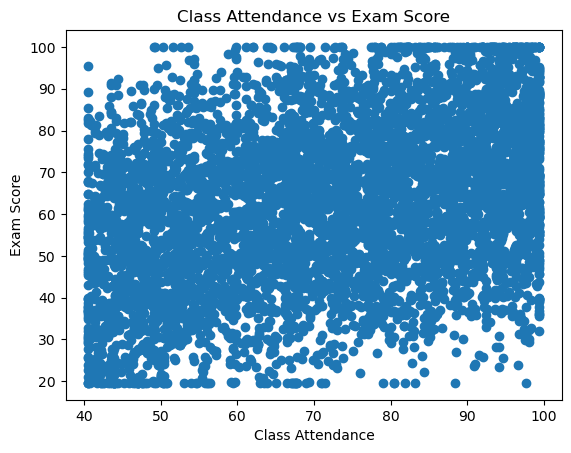

In [6]:
plt.scatter(df['class_attendance'][::100], df['exam_score'][::100])
plt.xlabel('Class Attendance')
plt.ylabel('Exam Score')
plt.title('Class Attendance vs Exam Score')
plt.show()

In [7]:
# #Creating a correlation matrix
# corr_matrix = df_encoded[['study_hours', 'sleep_hours', ]].corr()

# #Visualizing the matrix with seaborn
# sns.heatmap(corr_matrix,
#             annot = False,
#             cmap = 'coolwarm')

# plt.title('Correlation Matrix')
# plt.show()

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
cat_columns = ['gender', 'course', 'internet_access', 'study_method']
ord_cat_columns = ['sleep_quality', 'facility_rating', 'exam_difficulty']

In [10]:
sleep_qual_order = [['poor', 'average', 'good']]
fac_rating_order = [['low', 'medium', 'high']]
exam_diff_order = [['easy', 'moderate', 'hard']]

In [11]:
transformer = ColumnTransformer(
    transformers = [
        ('ord_sleep', OrdinalEncoder(categories = sleep_qual_order), ['sleep_quality']),
        ('ord_facility', OrdinalEncoder(categories = fac_rating_order), ['facility_rating']),
        ('ord_exam_diff', OrdinalEncoder(categories = exam_diff_order), ['exam_difficulty']),
        ('cat', OneHotEncoder(), cat_columns)
],
remainder = 'passthrough')

In [12]:
# Splitting the data into X and y
X = df.drop('exam_score', axis = 1)
y = df['exam_score']

#Creating train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 31)

In [13]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)


In [14]:
X_test_transformed

array([[ 0.  ,  2.  ,  1.  , ...,  3.78, 56.6 ,  4.6 ],
       [ 0.  ,  2.  ,  0.  , ...,  6.28, 60.1 ,  7.2 ],
       [ 2.  ,  1.  ,  1.  , ...,  2.75, 88.3 ,  5.8 ],
       ...,
       [ 0.  ,  0.  ,  1.  , ...,  7.73, 70.2 ,  4.1 ],
       [ 1.  ,  0.  ,  1.  , ...,  6.25, 84.6 ,  9.9 ],
       [ 0.  ,  2.  ,  2.  , ...,  0.2 , 70.9 ,  4.1 ]])

In [15]:
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)

y_preds = lr.predict(X_test_transformed)

In [16]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error

print('rmse :', root_mean_squared_error(y_test, y_preds))
print('mae: ', mean_absolute_error(y_preds, y_test))
print('mse: ', mean_squared_error(y_preds, y_test))

rmse : 8.890780235546513
mae:  7.100950066002279
mse:  79.04597319678453


In [17]:
X_test_2 = pd.read_csv('test.csv')

X_test_2_transformed = transformer.transform(X_test_2)

In [18]:
y_pred_2 = lr.predict(X_test_2_transformed)

In [19]:
submission = pd.read_csv('sample_submission.csv')

submission['exam_score'] = y_pred_2

In [20]:
submission.to_csv('submission.csv', index = False)

print("submission.csv saved successfully")

submission.csv saved successfully


In [21]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 31)

In [22]:
tree.fit(X_train_transformed, y_train)

DecisionTreeRegressor(random_state=31)

In [23]:
y_pred_tree = tree.predict(X_test_transformed)

In [24]:
print('rmse :', root_mean_squared_error(y_pred_tree, y_test))
print('mae: ', mean_absolute_error(y_pred_tree, y_test))
print('mse: ', mean_squared_error(y_pred_tree, y_test))

rmse : 12.855972550686726
mae:  10.153279566137565
mse:  165.27603022401058


In [25]:
# Hyperparameter tuning with randomized search
# from scipy.stats import randint
# from sklearn.model_selection import RandomizedSearchCV

# tree_2 = DecisionTreeRegressor(random_state = 31)

# param_dist = {
#     'max_depth' : randint(1, 20),
#     'min_samples_split' : randint(2, 20),
#     'min_samples_leaf' : randint(1, 20)
# }

# tree_random = RandomizedSearchCV(tree_2, param_distributions = param_dist,
#                                  n_iter = 50, random_state = 31)

# tree_random.fit(X_train_transformed, y_train)

# print(tree_random.best_params_)
# print(tree_random.best_score_)

In [26]:
best_tree_model = DecisionTreeRegressor(max_depth = 12, min_samples_leaf = 14, min_samples_split = 6, random_state = 31)

best_tree_model.fit(X_train_transformed, y_train)

y_pred_tree_2 = best_tree_model.predict(X_test_transformed)

In [27]:
print('rmse: ', root_mean_squared_error(y_pred_tree_2, y_test))
print('mae: ', mean_absolute_error(y_pred_tree_2, y_test))
print('mse: ', mean_squared_error(y_pred_tree_2, y_test))

rmse:  9.212294210146217
mae:  7.345819933814439
mse:  84.86636461429352


In [28]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 30, random_state = 31)

forest.fit(X_train_transformed, y_train)

RandomForestRegressor(n_estimators=30, random_state=31)

In [29]:
y_pred_forest = forest.predict(X_test_transformed)

In [30]:
print('rmse :', root_mean_squared_error(y_pred_forest, y_test))
print('mae: ', mean_absolute_error(y_pred_forest, y_test))
print('mse: ', mean_squared_error(y_pred_forest, y_test))

rmse : 9.172060401796315
mae:  7.302439077601412
mse:  84.12669201419999


In [31]:
y_pred_rf = forest.predict(X_test_2_transformed)

In [32]:
submission_1 = pd.read_csv('sample_submission.csv')

submission_1['exam_score'] = y_pred_rf

In [33]:
submission_1.to_csv('submission_1.csv', index = False)

print('csv saved successfully')

csv saved successfully


In [ ]:
# # Tuning the model
# param_dist = {
#     'max_depth' : randint(3, 12),
#     'min_samples_split' : randint(2, 10),
#     'min_samples_leaf' : randint(1, 5),
#     'n_estimators': [50, 100]
# }

# rand_search_forest = RandomizedSearchCV(forest, param_distributions = param_dist, random_state = 31,
#                                         n_iter = 20, cv = 3)

# rand_search_forest.fit(X_train_transformed, y_train)

# print(rand_search_forest.best_params_)
# print(rand_search_forest.best_score_)

In [35]:
# Using best parameters from randomized Search.
tuned_rand_forest = RandomForestRegressor(max_depth = 11, min_samples_leaf = 1,
                                          min_samples_split = 5, n_estimators = 100, random_state = 31)

tuned_rand_forest.fit(X_train_transformed, y_train)

y_pred_forest_2 = tuned_rand_forest.predict(X_test_transformed)

In [36]:
print('rmse :', root_mean_squared_error(y_pred_forest_2, y_test))
print('mae: ', mean_absolute_error(y_pred_forest_2, y_test))
print('mse: ', mean_squared_error(y_pred_forest_2, y_test))

rmse : 9.010091210321727
mae:  7.196177253131528
mse:  81.18174361831686


In [52]:
import xgboost as xgb

base_xgb = xgb.XGBRegressor(random_state = 31)

base_xgb.fit(X_train_transformed, y_train)

y_pred_xgb = base_xgb.predict(X_test_transformed)

In [53]:
print('rmse :', root_mean_squared_error(y_pred_xgb, y_test))
print('mae: ', mean_absolute_error(y_pred_xgb, y_test))
print('mse: ', mean_squared_error(y_pred_xgb, y_test))

rmse : 8.822572176593606
mae:  7.034352657662244
mse:  77.83777981120363


In [54]:
param_dist = {
    'max_depth' : randint(3, 12),
    'learning_rate': uniform(0.01, 0.3),
    'min_child_weight' : randint(1, 10),
    'gamma' : uniform(0, 0.5),
    'n_estimators' : randint(100, 500),
    'subsample' : uniform(0.6, 0.4)
}

random_search_xgb = RandomizedSearchCV(base_xgb, param_distributions = param_dist, cv = 3)

random_search_xgb.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E0ADC55880>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E0EB8DD9D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E0EB8DEFC0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002E0EB8DDDF0>})

In [55]:
print(random_search_xgb.best_params_)
print(random_search_xgb.best_score_)

{'gamma': 0.03226842212390246, 'learning_rate': 0.014935775637277195, 'max_depth': 7, 'min_child_weight': 8, 'n_estimators': 410, 'subsample': 0.6028679248727005}
0.7828318907800359


In [56]:
best_xgb = random_search_xgb.best_estimator_

y_pred_xgb_2 = best_xgb.predict(X_test_transformed)

print('rmse :', root_mean_squared_error(y_pred_xgb_2, y_test))
print('mae: ', mean_absolute_error(y_pred_xgb_2, y_test))
print('mse: ', mean_squared_error(y_pred_xgb_2, y_test))

rmse : 8.799972451961064
mae:  7.02602946451274
mse:  77.43951515527364


In [57]:
y_pred_xgb_3 = best_xgb.predict(X_test_2_transformed)

In [58]:
submission_2 = pd.read_csv('sample_submission.csv')

submission_2['exam_score'] = y_pred_xgb_3

In [65]:
submission_2.to_csv('submission_2.csv', index = False)

print('saved successfully')

saved successfully


In [71]:
feature_names = transformer.get_feature_names_out()

In [74]:
best_xgb.get_booster().feature_names = list(feature_names)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

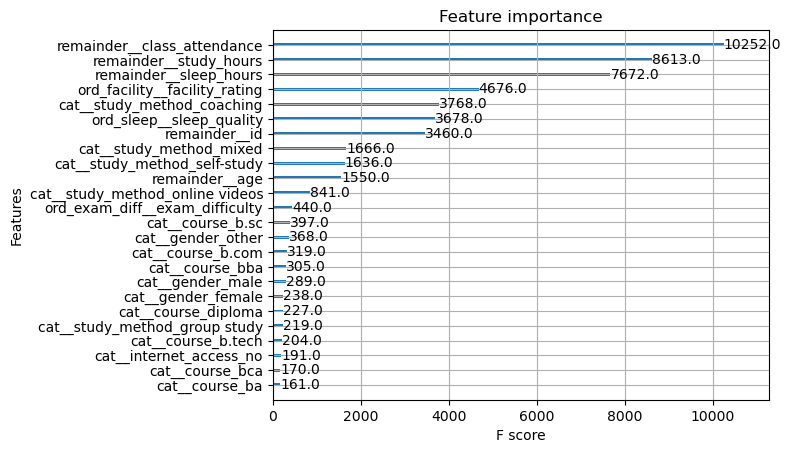

In [75]:
xgb.plot_importance(best_xgb)